In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from shutil import copy, rmtree 
import os
from sklearn.model_selection import train_test_split

In [ ]:
data_pd = pd.read_csv('/content/drive/MyDrive/Skin Cancer/HAM10000_metadata.csv')
data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df_count = data_pd.groupby('lesion_id').count()
df_count.head()

,image_id,dx,dx_type,age,sex,localization
lesion_id,,,,,,
HAM_0000000,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1


In [ ]:
df_count = df_count[df_count['dx'] == 1]
df_count.reset_index(inplace=True)

In [ ]:
def duplicates(x):
    unique = set(df_count['lesion_id'])
    if x in unique:
        return 'no' 
    else:
        return 'duplicates'

In [ ]:
data_pd['is_duplicate'] = data_pd['lesion_id'].apply(duplicates)
data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_duplicate
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,duplicates


In [ ]:
df_count = data_pd[data_pd['is_duplicate'] == 'no']

In [ ]:
train, test_df = train_test_split(df_count, test_size=0.15, stratify=df_count['dx'])

In [ ]:
def identify_trainOrtest(x):
    test_data = set(test_df['image_id'])
    if str(x) in test_data:
        return 'test'
    else:
        return 'train'

#creating train_df
data_pd['train_test_split'] = data_pd['image_id'].apply(identify_trainOrtest)
train_df = data_pd[data_pd['train_test_split'] == 'train']
train_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_duplicate,train_test_split
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,duplicates,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,duplicates,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,duplicates,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,duplicates,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,duplicates,train


In [ ]:
test_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_duplicate
5676,HAM_0005120,ISIC_0027685,nv,follow_up,50.0,male,foot,no
3454,HAM_0000175,ISIC_0028356,nv,follow_up,40.0,female,lower extremity,no
5342,HAM_0001029,ISIC_0024384,nv,follow_up,35.0,male,lower extremity,no
4045,HAM_0006829,ISIC_0024619,nv,follow_up,50.0,male,abdomen,no
4191,HAM_0003067,ISIC_0032084,nv,follow_up,60.0,male,abdomen,no


In [ ]:
len(train_df),len(test_df)

(9187, 828)

In [ ]:
# Image id of train and test images
train_list = list(train_df['image_id'])
test_list = list(test_df['image_id'])

#Set the image_id as the index in data_pd
data_pd.set_index('image_id', inplace=True)

In [ ]:
import os

base_dir = '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000'
train_dir = os.path.join(base_dir, 'train_dir')
test_dir = os.path.join(base_dir, 'test_dir')

os.mkdir(train_dir)
os.mkdir(test_dir)


In [ ]:
# Image id of train and test images
train_list = list(train_df['image_id'])
test_list = list(test_df['image_id'])

In [ ]:
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [ ]:
for i in targetnames:
    directory1=train_dir+'/'+i
    directory2=test_dir+'/'+i
    os.mkdir(directory1)
    os.mkdir(directory2)

In [ ]:
data_pd.index

Index(['ISIC_0027419', 'ISIC_0025030', 'ISIC_0026769', 'ISIC_0025661',
       'ISIC_0031633', 'ISIC_0027850', 'ISIC_0029176', 'ISIC_0029068',
       'ISIC_0025837', 'ISIC_0025209',
       ...
       'ISIC_0028393', 'ISIC_0024948', 'ISIC_0028619', 'ISIC_0033705',
       'ISIC_0031430', 'ISIC_0033084', 'ISIC_0033550', 'ISIC_0033536',
       'ISIC_0032854', 'ISIC_0032258'],
      dtype='object', name='image_id', length=10015)

In [ ]:
print(train_list)

['ISIC_0027419', 'ISIC_0025030', 'ISIC_0026769', 'ISIC_0025661', 'ISIC_0031633', 'ISIC_0027850', 'ISIC_0029176', 'ISIC_0029068', 'ISIC_0025837', 'ISIC_0025209', 'ISIC_0025276', 'ISIC_0029396', 'ISIC_0025984', 'ISIC_0025767', 'ISIC_0032417', 'ISIC_0031326', 'ISIC_0025915', 'ISIC_0031029', 'ISIC_0029836', 'ISIC_0032129', 'ISIC_0032343', 'ISIC_0025033', 'ISIC_0027310', 'ISIC_0032128', 'ISIC_0025937', 'ISIC_0027828', 'ISIC_0029291', 'ISIC_0030698', 'ISIC_0025567', 'ISIC_0031753', 'ISIC_0026835', 'ISIC_0031159', 'ISIC_0031017', 'ISIC_0024981', 'ISIC_0027815', 'ISIC_0024324', 'ISIC_0029559', 'ISIC_0030661', 'ISIC_0027053', 'ISIC_0028560', 'ISIC_0031650', 'ISIC_0029161', 'ISIC_0026273', 'ISIC_0025076', 'ISIC_0029687', 'ISIC_0025642', 'ISIC_0025819', 'ISIC_0032013', 'ISIC_0031691', 'ISIC_0025419', 'ISIC_0030105', 'ISIC_0025016', 'ISIC_0029147', 'ISIC_0029301', 'ISIC_0026637', 'ISIC_0030377', 'ISIC_0027960', 'ISIC_0026955', 'ISIC_0028052', 'ISIC_0025286', 'ISIC_0031468', 'ISIC_0030926', 'ISIC_0

In [ ]:
data_pd

,lesion_id,dx,dx_type,age,sex,localization,is_duplicate,train_test_split
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,duplicates,train
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,duplicates,train
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,duplicates,train
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,duplicates,train
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,duplicates,train
...,...,...,...,...,...,...,...,...
ISIC_0033084,HAM_0002867,akiec,histo,40.0,male,abdomen,duplicates,train
ISIC_0033550,HAM_0002867,akiec,histo,40.0,male,abdomen,duplicates,train
ISIC_0033536,HAM_0002867,akiec,histo,40.0,male,abdomen,duplicates,train


In [ ]:
train_list[0]+'.jpg'

'ISIC_0027419.jpg'

In [ ]:
train_dir

'/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/train_dir'

In [ ]:
# for image in train_list:
#     file_name = image+'.jpg'
#     dir1 = "/content/drive/MyDrive/Skin Cancer/HAM10000_images_part_1"
#     dir2 = "/content/drive/MyDrive/Skin Cancer/HAM10000_images_part_2"
#     label = data_pd.loc[image, 'dx']

#     # path of source image 
#     source = os.path.join(dir1, file_name)
#     source = os.path.join(dir2, file_name)

#     # copying the image from the source to target file
#     target = os.path.join(train_dir, label, file_name)

#     copy(source, target)

In [ ]:
import os
from shutil import copy
from multiprocessing import Pool

train_dir = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/train_dir"

def copy_image(image):
    file_name = image + '.jpg'
    label = data_pd.loc[image, 'dx']

    # Define the possible directories where the source image may exist
    dir1 = "/content/drive/MyDrive/Skin Cancer/HAM10000_images_part_1"
    dir2 = "/content/drive/MyDrive/Skin Cancer/HAM10000_images_part_2"

    # Check if the image file exists in directory1
    source = os.path.join(dir1, file_name)
    if os.path.exists(source):
        # Copy the image from the source to the target file
        target = os.path.join(train_dir, label, file_name)
        copy(source, target)
    else:
        # If the image file does not exist in directory1, check directory2
        source = os.path.join(dir2, file_name)
        if os.path.exists(source):
            # Copy the image from the source to the target file
            target = os.path.join(train_dir, label, file_name)
            copy(source, target)
        else:
            print(f"Image file '{file_name}' not found in either directory.")

# Use multiprocessing to parallelize the copying process
if __name__ == '__main__':
    with Pool() as pool:
        pool.map(copy_image, train_list)


In [ ]:
import os
from shutil import copy
from multiprocessing import Pool

train_dir = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/test_dir"

def copy_image(image):
    file_name = image + '.jpg'
    label = data_pd.loc[image, 'dx']

    # Define the possible directories where the source image may exist
    dir1 = "/content/drive/MyDrive/Skin Cancer/HAM10000_images_part_1"
    dir2 = "/content/drive/MyDrive/Skin Cancer/HAM10000_images_part_2"

    # Check if the image file exists in directory1
    source = os.path.join(dir1, file_name)
    if os.path.exists(source):
        # Copy the image from the source to the target file
        target = os.path.join(test_dir, label, file_name)
        copy(source, target)
    else:
        # If the image file does not exist in directory1, check directory2
        source = os.path.join(dir2, file_name)
        if os.path.exists(source):
            # Copy the image from the source to the target file
            target = os.path.join(test_dir, label, file_name)
            copy(source, target)
        else:
            print(f"Image file '{file_name}' not found in either directory.")

# Use multiprocessing to parallelize the copying process
if __name__ == '__main__':
    with Pool() as pool:
        pool.map(copy_image, test_list)


## Training Data

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os
from shutil import copy, rmtree 
import tensorflow as tf
# import cv2

In [ ]:
def mk_file(file_path: str):
    if os.path.exists(file_path):
        rmtree(file_path)
    os.makedirs(file_path)

In [ ]:
# Source directory
cwd = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000"
data_root = os.path.abspath(cwd)
origin_data_path = os.path.join(data_root, "train_dir")
assert os.path.exists(origin_data_path), "Path '{}' does not exist.".format(origin_data_path)

In [ ]:
data_class = [cla for cla in os.listdir(origin_data_path)
                if os.path.isdir(os.path.join(origin_data_path, cla))]
data_class

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [ ]:
# Augmentation directory
train_root = os.path.join(data_root,"8000_train")
mk_file(train_root)
for cla in data_class:
    mk_file(os.path.join(train_root, cla))
!ls {train_root}

akiec  bcc  bkl  df  mel  nv  vasc


In [ ]:
origin_data_path

'/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/train_dir'

In [ ]:
train_root

'/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/8000_train'

## Augmentation of Images 8000 per class 

In [ ]:
# Augmenting images and storing them in temporary directories 
for img_class in data_class:

    #creating temporary directories
    # creating a base directory
    aug_dir = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/aug_dir"   
    # creating a subdirectory inside the base directory for images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')

    mk_file(img_dir)
    
    cla_path = os.path.join(origin_data_path,img_class)
    img_list = os.listdir(cla_path)

    # Copy images from the class train dir to the img_dir 
    for index, image in enumerate(img_list):
    # for file_name in img_list:

        # path of source image in training directory
        image_path = os.path.join(cla_path,image)
        # source = os.path.join(train_dir,img_class, file_name)

        # creating a target directory to send images 
        tag_path = os.path.join(data_root,img_dir,image)
        # target = os.path.join(img_dir, file_name)

        # copying the image from the source to target file
        copy(image_path, tag_path)

    # Temporary augumented dataset directory.
    source_path = os.path.join(data_root,aug_dir)

    # Augmented images will be saved to training directory
    save_path = os.path.join(train_root,img_class)
    # save_path = train_dir + img_class

    # Creating Image Data Generator to augment images
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(

        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'

    )

    batch_size = 20

    aug_datagen = datagen.flow_from_directory(source_path,save_to_dir=save_path,save_format='jpg',save_prefix='trans_',target_size=(299, 299),batch_size=batch_size)

    # Generate the augmented images. Default:8000->51699
    aug_images = 8000 #29263
    
    num_files = len(img_list)
    # num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((aug_images - num_files) / batch_size))

    # creating 8000 augmented images per class
    for i in range(0, num_batches):
        images, labels = next(aug_datagen)

    # delete temporary directory 
    rmtree(aug_dir)

Found 304 images belonging to 1 classes.
Found 488 images belonging to 1 classes.
Found 1033 images belonging to 1 classes.
Found 109 images belonging to 1 classes.
Found 1079 images belonging to 1 classes.
Found 6042 images belonging to 1 classes.
Found 132 images belonging to 1 classes.


In [ ]:
# detect 
total_num = 0
for cla in data_class:
    cla_path = os.path.join(train_root, cla)
    images = os.listdir(cla_path)
    num = len(images)
    total_num += num
    for index, image in enumerate(images):
 
        print("\r[{}] processing [{}/{}]".format(cla, index+1, num), end="")  # processing bar
    # break
    print()

print(f"processing {total_num} done!")

[akiec] processing [7316/7316]
[bcc] processing [7340/7340]
[bkl] processing [6938/6938]
[df] processing [7185/7185]
[mel] processing [6934/6934]
[nv] processing [1960/1960]
[vasc] processing [7432/7432]
processing 45105 done!


In [ ]:
# copy origin_data_path(9187) to train_root().
total_num = 0
for cla in data_class:

    cla_path = os.path.join(origin_data_path, cla)
    images = os.listdir(cla_path)
    num = len(images)
    total_num += num
    for index, image in enumerate(images):
        image_path = os.path.join(cla_path, image)
        img_name = image_path.split('/')[-1].split(".")[0]
        savepath = os.path.join(train_root, cla,img_name + ".jpg")

        img = Image.open(image_path)
        img = img.resize((299, 299), resample=Image.LANCZOS)
        img.save(savepath,quality=100)
        # png
        # cv2.imwrite(savepath,img, [int(cv2.IMWRITE_PNG_COMPRESSION), 1])
        # cv2.resize()
        # jpg
        # cv2.imwrite(savepath,img,[int(cv2.IMWRITE_JPEG_QUALITY),100])

        print("\r[{}] processing [{}/{}]".format(cla, index+1, num), end="")  # processing bar
    # break
    print()

print(f"processing {total_num} done!")

[akiec] processing [304/304]
[bcc] processing [488/488]
[bkl] processing [1033/1033]
[df] processing [109/109]
[mel] processing [1079/1079]
[nv] processing [6042/6042]
[vasc] processing [132/132]
processing 9187 done!


In [ ]:
import glob

def count_jpg_images(directory):
    image_files = glob.glob(directory + '/**/*.jpg', recursive=True)
    return len(image_files)

directory = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/8000_train"
image_count = count_jpg_images(directory)
print("Number of JPG images:", image_count)


Number of JPG images: 54292


## Testing Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import os
from shutil import copy, rmtree, move
import random
import cv2

In [ ]:
def display(image):
    fig=plt.figure(figsize=(4,3))
    ax=fig.add_subplot(111)
    ax.imshow(image)
def img_bgr(image):
    (B,G,R) = cv2.split(image)
    return B,G,R
def img_rotate(img,ro=15,savepath="Rotated.jpg"):
    rotated = imutils.rotate_bound(img, ro)
    cv2.imwrite(savepath,rotated)
def img_rgb(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image
def img_svd(img,k=90):
    u,s,v = np.linalg.svd(img,full_matrices=0)
    img = np.dot(u[:,:k]*s[:k],v[:k,:]).astype(np.uint8)
    return img
def img_merged(B,G,R):
    merged = cv2.merge([B,G,R])
    return merged
def mk_file(file_path: str):
    if os.path.exists(file_path):
        rmtree(file_path)
    os.makedirs(file_path)


In [ ]:
# Source directory
cwd = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000"
data_root = os.path.abspath(cwd)
origin_data_path = os.path.join(data_root, "test_dir")
assert os.path.exists(origin_data_path), "Path '{}' does not exist.".format(origin_data_path)

In [ ]:
data_class = [cla for cla in os.listdir(origin_data_path)
                if os.path.isdir(os.path.join(origin_data_path, cla))]

In [ ]:
train_root = os.path.join(data_root,"testimg45")
mk_file(train_root)
for cla in data_class:
    mk_file(os.path.join(train_root, cla))

In [ ]:
#SVD
total_num = 0
for cla in data_class:
    cla_path = os.path.join(origin_data_path, cla)
    images = os.listdir(cla_path)
    num = len(images)
    total_num += num
    for index, image in enumerate(images):
        image_path = os.path.join(cla_path, image)
        img_name = image_path.split('/')[-1].split(".")[0]
        savepath = os.path.join(train_root, cla,img_name + ".jpg")

        img = cv2.imread(image_path)
        B,G,R = img_bgr(img)
        b = img_svd(B)
        g = img_svd(G)
        r = img_svd(R)
        img = img_merged(b,g,r)
        #png
        # cv2.imwrite(savepath,img, [int(cv2.IMWRITE_PNG_COMPRESSION), 1])
        #jpg
        cv2.imwrite(savepath,img,[int(cv2.IMWRITE_JPEG_QUALITY),100])
 
 
        print("\r[{}] processing [{}/{}]".format(cla, index+1, num), end="")  # processing bar
    # break
    print()

print(f"processing {total_num} done!")

[akiec] processing [23/23]
[bcc] processing [26/26]
[bkl] processing [66/66]
[df] processing [6/6]
[mel] processing [34/34]
[nv] processing [663/663]
[vasc] processing [10/10]
processing 828 done!


In [ ]:
import glob

def count_jpg_images(directory):
    image_files = glob.glob(directory + '/**/*.jpg', recursive=True)
    return len(image_files)

directory = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/testimg45"
image_count = count_jpg_images(directory)
print("Number of JPG images:", image_count)


Number of JPG images: 828


## Splitting the validation data from train_dir

In [ ]:
import os
from shutil import copy, rmtree
import random

In [ ]:
def mk_file(file_path: str):
    if os.path.exists(file_path):
        rmtree(file_path)
    os.makedirs(file_path)

In [ ]:
random.seed(0)

split_rate = 0.11

cwd = '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000'
# data_root = os.path.join(cwd, "data_data")#win_powershell
data_root = os.path.abspath(os.path.join(cwd))
origin_data_path = os.path.join(data_root, "train_dir")
assert os.path.exists(origin_data_path), "path '{}' does not exist.".format(origin_data_path)

In [ ]:
data_class = [cla for cla in os.listdir(origin_data_path)
                if os.path.isdir(os.path.join(origin_data_path, cla))]

train_root = os.path.join(data_root, "train45")
mk_file(train_root)
for cla in data_class:
    mk_file(os.path.join(train_root, cla))

val_root = os.path.join(data_root, "valimg45")
mk_file(val_root)
for cla in data_class:
    mk_file(os.path.join(val_root, cla))

In [78]:
total_num = 0
for cla in data_class:
    cla_path = os.path.join(origin_data_path, cla)
    images = os.listdir(cla_path)
    num = len(images)
    total_num += num
    eval_index = random.sample(images, k=int(num*split_rate))
    for index, image in enumerate(images):
        if image in eval_index:
            image_path = os.path.join(cla_path, image)
            new_path = os.path.join(val_root, cla)
            copy(image_path, new_path)
        else:
            image_path = os.path.join(cla_path, image)
            new_path = os.path.join(train_root, cla)
            copy(image_path, new_path)
        print("\r[{}] processing [{}/{}]".format(cla, index+1, num), end="")  # processing bar
    print()

print(f"processing {total_num} done!")

[akiec] processing [304/304]
[bcc] processing [488/488]
[bkl] processing [1033/1033]
[df] processing [109/109]
[mel] processing [1079/1079]
[nv] processing [6042/6042]
[vasc] processing [132/132]
processing 9187 done!


In [79]:
import glob

def count_jpg_images(directory):
    image_files = glob.glob(directory + '/**/*.jpg', recursive=True)
    return len(image_files)

directory = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/train45"
image_count = count_jpg_images(directory)
print("Number of JPG images:", image_count)


Number of JPG images: 8181


In [80]:
import glob

def count_jpg_images(directory):
    image_files = glob.glob(directory + '/**/*.jpg', recursive=True)
    return len(image_files)

directory = "/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/valimg45"
image_count = count_jpg_images(directory)
print("Number of JPG images:", image_count)


Number of JPG images: 1006


In [142]:
# import shutil

# path = '/content/tmp'

# shutil.rmtree(path)

# print(f"The directory '{path}' and all its subdirectories have been deleted.")


The directory '/content/tmp' and all its subdirectories have been deleted.


In [82]:
! bash '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/echo_num.sh' '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/train45' #0.816

==/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/train45==
akiec: 	271
bcc: 	435
bkl: 	920
df: 	98
mel: 	961
nv: 	5378
vasc: 	118
total:8181


In [83]:
! bash '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/echo_num.sh' '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/testimg45' #0.082

==/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/testimg45==
akiec: 	23
bcc: 	26
bkl: 	66
df: 	6
mel: 	34
nv: 	663
vasc: 	10
total:828


In [84]:
! bash '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/echo_num.sh' '/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/valimg45' #0.100

==/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/valimg45==
akiec: 	33
bcc: 	53
bkl: 	113
df: 	11
mel: 	118
nv: 	664
vasc: 	14
total:1006


## CapsNets_Skin_Classification

In [85]:
! pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00


In [86]:
! pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
from einops import rearrange, repeat,reduce
from einops.layers.torch import Rearrange
from torch import linalg as LA

In [144]:
import torch
import sys, os
import json
import torch.nn as nn  
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim

# from torch.utils.tensorboard import SummaryWriter
import prettytable
import time, random,timeit
sys.setrecursionlimit(15000)
from thop.profile import profile

from PIL import Image
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchsummary import summary
from tqdm.notebook import tqdm
import seaborn as sns

import sys
sys.path.append('/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000')
from utils import ImageShow, draw_size_acc, one_hot, confusion_matrix, metrics_scores, pff, setup_seed

setup_seed(3047)

from model import CapsNet

In [145]:
# Settings.
sys.path.append(os.pardir)
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
img_title = "HAM10000" #"Skin_Cancer"
best_acc = 0.
eval_acc = 0.
best_train = 0.
dict_batch = {}
dict_imgSize = {}


try:
    print(len(train_acc_list))
except NameError:
    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []
    test_auc_list = []
    val_loss_list = []
    val_acc_list = []
#activate ImageShow
show = ImageShow(train_loss_list = train_loss_list,
                 train_acc_list = train_acc_list,
                test_loss_list = test_loss_list,
                test_acc_list = test_acc_list,
                test_auc_list = test_auc_list,
                val_loss_list = val_loss_list,
                val_acc_list = val_acc_list,
                )

0


In [146]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
normalize = transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])
# Resize = transforms.Resize((299,299))

def get_data(mode='ALL'):
    global test_dataset,train_loader,val_loader,test_loader
    global train_num,val_num,test_num,n_classes,cla_dict
    # vt = int(trans)
    data_transform = {
        "train": transforms.Compose([#Resize,
                                     transforms.RandomVerticalFlip(),
                                     transforms.ToTensor(),
                                     normalize]),
        "val": transforms.Compose([#Resize,
                                   transforms.ToTensor(),
                                   normalize]),
        "test": transforms.Compose([#Resize,
                                    transforms.ToTensor(),
                                    normalize]),}    
    if mode == 'ALL':
        train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/8000_train',transform=data_transform["train"])
        val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/valimg45',transform=data_transform["val"])
        test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/testimg45',transform=data_transform["test"])

        train_num = len(train_dataset)
        val_num = len(val_dataset)
        test_num = len(test_dataset)

        train_loader = DataLoader(train_dataset,batch_size=BatchSize,
                                                   pin_memory=pin_memory,
                                                   shuffle=True,num_workers=nw)
        val_loader = DataLoader(val_dataset,batch_size=V_size,
                                                   pin_memory=pin_memory,
                                                   shuffle=False,num_workers=nw)
        test_loader = DataLoader(test_dataset,batch_size=T_size,
                                                  pin_memory=pin_memory,
                                                  shuffle=False,num_workers=nw)

        print("using {} images for training, {} images for validation, {} images for testing.".format(train_num,
                                                                                                      val_num,
                                                                                                      test_num))
    else:
        test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Skin_Cancer_Classification_CapsNet/HAM10000/testimg45',transform=data_transform["test"])
        test_num = len(test_dataset)
        test_loader = DataLoader(test_dataset,batch_size=T_size,
                                                  pin_memory=pin_memory,
                                                  shuffle=False,num_workers=nw)
        print(f"using {test_num} images for testing.")
    
    data_list = test_dataset.class_to_idx
    cla_dict = dict((val, key) for key, val in data_list.items())
    n_classes  = len(data_list)



In [147]:
BatchSize = 168
V_size = 32
T_size = 32

pin_memory = True
nw = 6
print(f'Using {nw} dataloader workers every process.')
get_data()
print(f'Using {n_classes} classes.')

Using 6 dataloader workers every process.
using 54292 images for training, 1006 images for validation, 828 images for testing.
Using 7 classes.


In [148]:
n_channels = 3 #RGB

network = CapsNet(conv_inputs=n_channels, 
                     num_classes=n_classes,# category_number
                     init_weights=True,)
network = network.to(device)

In [149]:
learning_rate = 0.123
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, 5, eta_min=1e-8, last_epoch=-1)

In [150]:
network.Convolution

Sequential(
  (0): Conv2d(3, 128, kernel_size=(21, 21), stride=(2, 2))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
)

In [151]:
def train(epoch):
    network.train()
    global best_train,train_evl_result#,evl_tmp_result
    running_loss,r_pre = 0., 0.
    print_step = len(train_loader)//2
    steps_num = len(train_loader)
    tmp_size = BatchSize
    print(f'\033[1;32m[Train Epoch:[{epoch}]{img_title} ==> Training]\033[0m ...')
    optimizer.zero_grad()
    train_tmp_result = torch.zeros(n_classes,n_classes)
    startT = timeit.default_timer() 
    
    for batch_idx, (data, target) in enumerate(train_loader):        

        batch_idx += 1
        target_indices = target
        target_one_hot = one_hot(target, length=n_classes)
        data, target = Variable(data).to(device), Variable(target_one_hot).to(device)

        output = network(data)
        loss = network.loss(output, target, size_average=True)       
        loss.backward()     
        optimizer.step()
        optimizer.zero_grad()
        
        running_loss += loss.item()
        
        # v_mag = torch.sqrt(torch.sum(output**2, dim=2, keepdim=True)) 
        # v_mag = torch.norm(output,p=2,dim=(2,3), keepdim=True)
        v_mag = LA.norm(output,ord='nuc',dim=(2,3), keepdim=True)#‘fro’ (default)
        pred = v_mag.data.max(1, keepdim=True)[1].cpu().squeeze()
        r_pre += pred.eq(target_indices.view_as(pred)).squeeze().sum()
        tmp_pre = r_pre/(batch_idx*BatchSize)
        
        if batch_idx % print_step == 0 and batch_idx != steps_num:
            print("[{}/{}] Loss{:.5f},ACC:{:.5f}".format(batch_idx,len(train_loader),
                                                         loss,tmp_pre))
        if batch_idx % steps_num == 0 and train_num % tmp_size != 0:
            tmp_size = train_num % tmp_size
                          
        for i in range(tmp_size):
            pred_x = pred.numpy()
            train_tmp_result[target_indices[i]][pred_x[i]] +=1

        if best_train < tmp_pre and tmp_pre >= 90: 
            torch.save(network.state_dict(), iter_path)
        
    epoch_acc = r_pre / train_num
    epoch_loss = running_loss / len(train_loader)  
    train_loss_list.append(epoch_loss)
    train_acc_list.append(epoch_acc) 
    scheduler.step()
    if best_train < epoch_acc:
        best_train = epoch_acc
        train_evl_result = train_tmp_result.clone()
        torch.save(network.state_dict(), last_path)
        torch.save(train_evl_result, f'./tmp/{img_title}/{dirs}/train_evl_result.pth')
    
    endT = timeit.default_timer()
    run_time = endT-startT
    print("Epoch:[{}] Running:[{:.2f}s], Loss:{:.5f},Acc:{:.5f},Best_train:{:.5f}".format(epoch,run_time,
                                                                                                 epoch_loss,
                                                                                                 epoch_acc,best_train))

In [152]:
def test(split="test"):
    network.eval()
    global test_acc,eval_acc,best_acc,net_parameters
    global test_evl_result,val_evl_result#,evl_tmp_result
    cor_loss,correct,Auc, Acc= 0, 0, 0, 0
    evl_tmp_result = torch.zeros(n_classes,n_classes)
    
    if split == 'val':
        data_loader = val_loader
        tmp_size = V_size
        data_num = val_num
    else:
        data_loader = test_loader
        tmp_size = T_size
        data_num = test_num
        
    steps_num = len(data_loader)
    print(f'\033[35m{img_title} ==> {split} ...\033[0m')
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            batch_idx +=1
            target_indices = target#torch.Size([batch, 7])  
            target_one_hot = one_hot(target, length=n_classes)            
            data, target = Variable(data).to(device), Variable(target_one_hot).to(device)

            output= network(data)#torch.Size([batch_size, 7, 16, 1])         
            v_mag = LA.norm(output,ord='nuc',dim=(2,3), keepdim=True)#
            pred = v_mag.data.max(1, keepdim=True)[1].cpu()#[9, 2, 1, 1, 6,..., 1, 4, 6, 5, 7,]
            
            if batch_idx % steps_num == 0 and data_num % tmp_size != 0:
                tmp_size = data_num % tmp_size
                          
            for i in range(tmp_size):
                pred_y = pred.numpy()
                evl_tmp_result[target_indices[i]][pred_y[i]] +=1 

        diag_sum = torch.sum(evl_tmp_result.diagonal())
        all_sum = torch.sum(evl_tmp_result) 
        test_acc = 100. * float(torch.div(diag_sum,all_sum)) 
        print(f"{split}_Acc:\033[1;32m{round(float(test_acc),3)}%\033[0m")

        if split == 'val':
            val_acc_list.append(test_acc)
            if test_acc >= best_acc:
                best_acc = test_acc
                val_evl_result = evl_tmp_result.clone()#copy.deepcopy(input)
                torch.save(network.state_dict(), save_PATH)
                torch.save(val_evl_result, f'./tmp/{img_title}/{dirs}/best_evl_result.pth')
            print(f"Best_val:\033[1;32m[{round(float(best_acc),3)}%]\033[0m")
        else:
            test_acc_list.append(test_acc)
            if test_acc >= eval_acc:
                eval_acc = test_acc
                test_evl_result = evl_tmp_result.clone()#copy.deepcopy(input)
                torch.save(network.state_dict(), test_path)
                torch.save(test_evl_result, f'./tmp/{img_title}/{dirs}/{split}_evl_result.pth')
            print(f"Best_eval:\033[1;32m[{round(float(eval_acc),3)}%]\033[0m")  

In [156]:
num_epochs= 20

In [157]:
#create store
try:
    print(f"suf:{suf}")
except NameError:
    suf = time.strftime("%m%d_%H%M%S", time.localtime())
    dirs = suf + f"_{sub_dirs}_nw{nw}_{num_epochs}ep_"
    print(f"suf:{suf}")   
if os.path.exists(f'./tmp/{img_title}/{dirs}'):
    print (f'Store: "./tmp/{img_title}/{dirs}"')
else:
    !mkdir -p ./tmp/{img_title}/{dirs}
iter_path = f'./tmp/{img_title}/{dirs}/train_{img_title}_{suf}.pth' #training
save_PATH = f'./tmp/{img_title}/{dirs}/best_{img_title}_{suf}.pth' #validation
last_path = f'./tmp/{img_title}/{dirs}/last_{img_title}_{suf}.pth' #training
test_path = f'./tmp/{img_title}/{dirs}/test_best_{img_title}_{suf}.pth' #testing
print(save_PATH)

suf:0608_140126
Store: "./tmp/HAM10000/None"
./tmp/HAM10000/None/best_HAM10000_0608_140126.pth


In [158]:
# network.load_state_dict(torch.load(last_path))
for epoch in range(1, num_epochs + 1): 
    train(epoch)
    test('val')
    
print('Finished Training')

[Train Epoch:[1]HAM10000 ==> Training] ...
[162/324] Loss0.27109,ACC:0.56610
Epoch:[1] Running:[405.26s], Loss:0.27373,Acc:0.58498,Best_train:0.58498
HAM10000 ==> val ...
val_Acc:77.137%
Best_val:[77.137%]
[Train Epoch:[2]HAM10000 ==> Training] ...
[162/324] Loss0.23459,ACC:0.64095
Epoch:[2] Running:[391.11s], Loss:0.23977,Acc:0.64584,Best_train:0.64584
HAM10000 ==> val ...
val_Acc:63.519%
Best_val:[77.137%]
[Train Epoch:[3]HAM10000 ==> Training] ...
[162/324] Loss0.23257,ACC:0.66608
Epoch:[3] Running:[392.81s], Loss:0.21911,Acc:0.67524,Best_train:0.67524
HAM10000 ==> val ...
val_Acc:71.173%
Best_val:[77.137%]
[Train Epoch:[4]HAM10000 ==> Training] ...
[162/324] Loss0.20698,ACC:0.70018
Epoch:[4] Running:[392.86s], Loss:0.19948,Acc:0.70559,Best_train:0.70559
HAM10000 ==> val ...
val_Acc:81.61%
Best_val:[81.61%]
[Train Epoch:[5]HAM10000 ==> Training] ...
[162/324] Loss0.20606,ACC:0.72274
Epoch:[5] Running:[396.01s], Loss:0.18735,Acc:0.72606,Best_train:0.72606
HAM10000 ==> val ...
val_Acc

In [159]:
show.conclusion(opt='val',img_title=img_title)

=================Conclusion====================
Dataset:[HAM10000]
Best_Epoch [18]
[Val] ACC:86.68%.


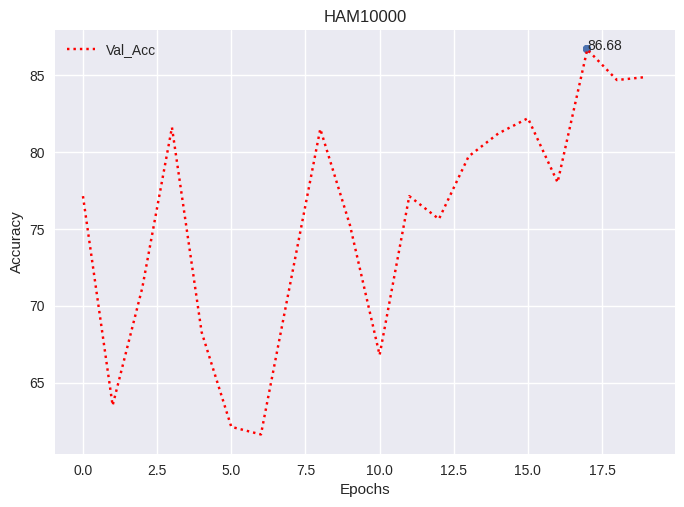

In [160]:
show.val(write=True,custom_path='./tmp',img_title=img_title,suf=dirs)

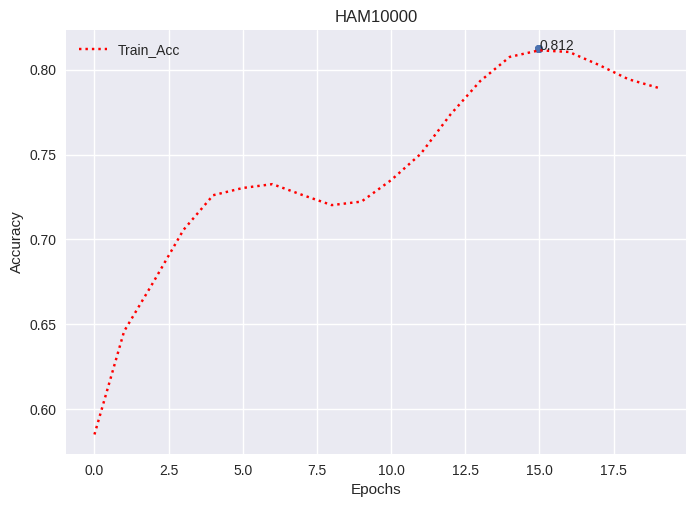

In [161]:
show.train(opt='Acc',write=True,custom_path='./tmp',img_title=img_title,suf=dirs)

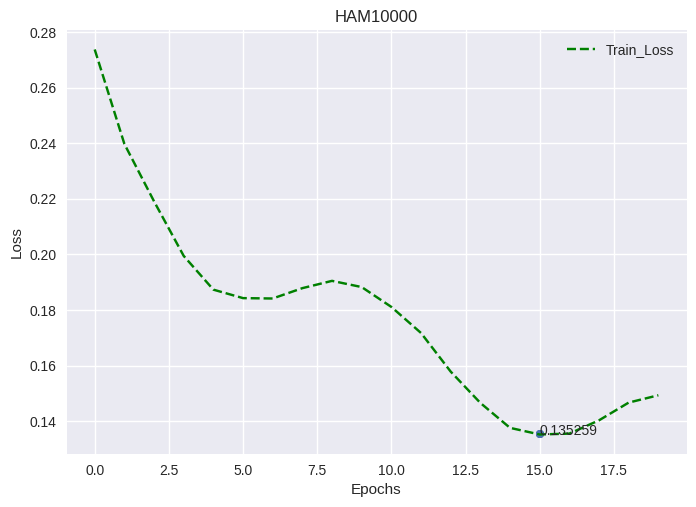

In [162]:
plt.clf()#clear photo
show.train(write=True,custom_path='./tmp',img_title=img_title,suf=dirs)

In [163]:
network.load_state_dict(torch.load(save_PATH))

dict_bat = {}
for k in range(16,65):
    T_size = k

    print(f"T_size:{k}")
    get_data('test')

    # for j in range(3):
    test()

    if dict_bat.get(k) is None or dict_bat[k] < test_acc:
            dict_bat[k] = test_acc

T_size:16
using 828 images for testing.
HAM10000 ==> test ...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


test_Acc:94.444%
Best_eval:[94.444%]
T_size:17
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:94.444%
Best_eval:[94.444%]
T_size:18
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:93.961%
Best_eval:[94.444%]
T_size:19
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:94.565%
Best_eval:[94.565%]
T_size:20
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:93.841%
Best_eval:[94.565%]
T_size:21
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:94.686%
Best_eval:[94.686%]
T_size:22
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:95.048%
Best_eval:[95.048%]
T_size:23
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:94.082%
Best_eval:[95.048%]
T_size:24
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:95.048%
Best_eval:[95.048%]
T_size:25
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:95.169%
Best_eval:[95.169%]
T_size:26
using 828 images for testing.
HAM10000 ==> test ...
test_Acc:9

In [164]:
show.conclusion(img_title=img_title)
print(sorted(dict_bat.items(), key=lambda x: x[1], reverse=True)[0:9])

=================Conclusion====================
Dataset:[HAM10000]
Best_Epoch [10]
[Test] ACC:95.17%.
[(25, 95.16907930374146), (22, 95.04830837249756), (24, 95.04830837249756), (21, 94.68598961830139), (19, 94.5652186870575), (16, 94.44444179534912), (17, 94.44444179534912), (38, 94.32367086410522), (23, 94.08212304115295)]


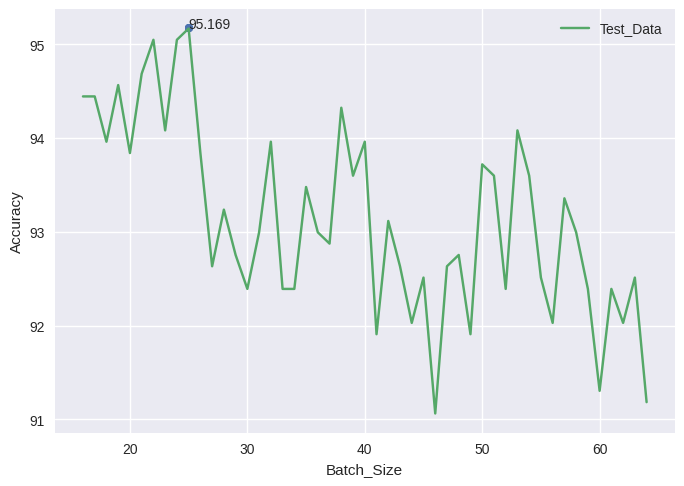

In [165]:
draw_size_acc(dict_bat,custom_path='./tmp',img_title=img_title,suf=dirs)

In [166]:
metrics_scores(test_evl_result,n_classes,cla_dict)

+--------+-----------+--------+--------+----------+
|  Type  | Precision | Recall |   F1   | Accuracy |
+--------+-----------+--------+--------+----------+
| akiec  |   0.7333  | 0.9565 | 0.8302 |          |
|  bcc   |   0.8065  | 0.9615 | 0.8772 |          |
|  bkl   |   0.8615  | 0.8485 | 0.855  |          |
|   df   |    0.25   | 0.3333 | 0.2857 |          |
|  mel   |   0.8125  | 0.3824 |  0.52  |          |
|   nv   |   0.9895  | 0.9955 | 0.9925 |          |
|  vasc  |   0.9091  |  1.0   | 0.9524 |          |
| Total: |   0.7661  | 0.7825 | 0.759  |  0.9517  |
+--------+-----------+--------+--------+----------+


In [167]:
metrics_scores(val_evl_result,n_classes,cla_dict)

+--------+-----------+--------+--------+----------+
|  Type  | Precision | Recall |   F1   | Accuracy |
+--------+-----------+--------+--------+----------+
| akiec  |   0.7576  | 0.7576 | 0.7576 |          |
|  bcc   |   0.7123  | 0.9811 | 0.8254 |          |
|  bkl   |   0.7391  | 0.7522 | 0.7456 |          |
|   df   |   0.5333  | 0.7273 | 0.6154 |          |
|  mel   |   0.6214  | 0.7373 | 0.6744 |          |
|   nv   |   0.9772  | 0.9051 | 0.9398 |          |
|  vasc  |   0.9333  |  1.0   | 0.9655 |          |
| Total: |   0.7535  | 0.8372 | 0.7891 |  0.8668  |
+--------+-----------+--------+--------+----------+


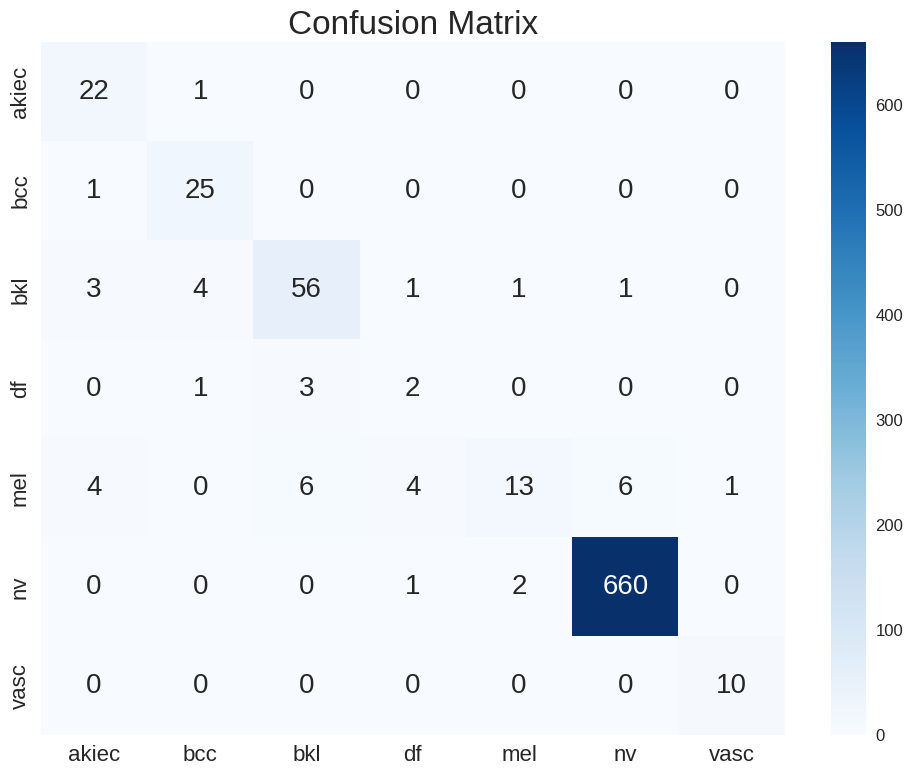

In [168]:
confusion_matrix(test_evl_result,n_classes,cla_dict,test_dataset,img_title=img_title,suf=dirs)

In [169]:
# # #save
# s0 = np.array(train_acc_list)
# np.save(f'./tmp/{img_title}/{dirs}/{img_title}_train_acc_{suf}.npy', s0)
# s1 = np.array(train_loss_list)
# np.save(f'./tmp/{img_title}/{dirs}/{img_title}_train_loss_{suf}.npy', s1)
# s2 = np.array(test_acc_list)
# np.save(f'./tmp/{img_title}/{dirs}/{img_title}_test_acc_{suf}.npy', s2)
# s3 = np.array(val_acc_list)
# np.save(f'./tmp/{img_title}/{dirs}/{img_title}_val_acc_{suf}.npy', s3)
# s4 = np.array(dict_batch)
# np.save(f'./tmp/{img_title}/{dirs}/{img_title}_dict_batch_{suf}.npy', s4)